In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

mm = preprocessing.MinMaxScaler()

In [2]:
def ConvertDateintoDay_Month_Year_Merged(df):
    newdf = pd.DataFrame()
    df.Date = pd.to_datetime(df.Date)
    newdf["FundName"] = df.FundName
    newdf["Nav"] = df.Nav
    newdf["day"] = df.Date.dt.day
    newdf["month"] = df.Date.dt.month
    newdf["year"] = df.Date.dt.year
    return newdf

def ConvertDateintoDay_Month_Year(df):
    newdf = pd.DataFrame()
    df.Date = pd.to_datetime(df.Date)
    newdf["Nav"] = df.Nav
    newdf["day"] = df.Date.dt.day
    newdf["month"] = df.Date.dt.month
    newdf["year"] = df.Date.dt.year
    return newdf

In [3]:
def OptimiseDataframe_merged(df,fundname):
    l = len(df["Date"].tolist())
    fund = [fundname]*l
    newdf = pd.DataFrame()
    newdf["FundName"] = fund
    newdf["Date"] = df.Date
    newdf["Nav"] = df.Open
    newdf.dropna()
    return newdf

def OptimiseDataframe(df):
    newdf = pd.DataFrame()
    newdf["Date"] = df.Date
    newdf["Nav"] = df.Open
    newdf.dropna()
    return newdf

In [4]:
def PredictBestMutualFund_merged(day,month,year,duration,algo):
    start = []
    end = []
    ans_start = []
    ans_end = []
    ans = []
    m = duration[0]
    y = duration[1]
    
    ele = (month+m)//12
    m = (month+m)%11
    
    y =y+ele+year
    input_start = [[day,month,year,0,0,0,0,0,0,0,0,0,0]]*10
    input_end = [[day,m,y,0,0,0,0,0,0,0,0,0,0]]*10
    
    for i in range(10):
        x = input_start[i].copy()
        start.append(x)
        y = input_end[i].copy()
        end.append(y)
    
    for i in range(len(start)):
        start[i][i+3] = 1
        end[i][i+3] = 1
        x = algo.predict([start[i]])
        y = algo.predict([end[i]])
        
        ans_x = np.array(x[0]).reshape(-1,1)
        ans_x = mm.inverse_transform(ans_x)
        ans_x = ans_x[0][0]
        
        ans_y = np.array(y[0]).reshape(-1,1)
        ans_y = mm.inverse_transform(ans_y)
        ans_y = ans_y[0][0]
        
        ans_start.append(ans_x)
        ans_end.append(ans_y)
        ans.append(CalculateReturn(ans_x,ans_y))
        
    print("Start :",start,"\nEnd: ",end)
    print("-----------------------------------------------------")
    print("Ans Start :",ans_start,"\n Ans_end",ans_end)
    print("-----------------------------------------------------")
    new_ans = [ans_end[i]-ans_start[i] for i in range(len(ans_start))]
    print("-----------------------------------------------------")
    print("Returns :",new_ans)
    return ans

def CalculateReturn(start,end):
    returns = (end-start)/start
    returns = returns*100
    return returns
    

In [5]:
dir_ = os.getcwd()
dir_ = os.path.join(dir_,"dataset")
dir_ = os.listdir(dir_)
dir_

['sbi consumption opportunities fund.csv',
 'sbi contra fund.csv',
 'SBI Equity Hybrid Fund.csv',
 'sbi focused fund.csv',
 'sbi healthcare opportunities fund.csv',
 'SBI Large & Midcap Fund.csv',
 'SBI Magnum Equity ESG Fund.csv',
 'SBI Magnum Income Fund.csv',
 'SBI Nifty Index Fund.csv',
 'sbi small cap.csv']

In [6]:
csv_file = [ele for ele in dir_ if ".csv" in ele]
csv_file 

['sbi consumption opportunities fund.csv',
 'sbi contra fund.csv',
 'SBI Equity Hybrid Fund.csv',
 'sbi focused fund.csv',
 'sbi healthcare opportunities fund.csv',
 'SBI Large & Midcap Fund.csv',
 'SBI Magnum Equity ESG Fund.csv',
 'SBI Magnum Income Fund.csv',
 'SBI Nifty Index Fund.csv',
 'sbi small cap.csv']

In [7]:
l = []
directory =  os.path.join(os.getcwd(),"dataset")
for i in csv_file:
    df = pd.read_csv(os.path.join(directory,i))
    l.append(df)
len(l)

10

In [8]:
df_list = []
for i in range(len(l)):
    fundname = csv_file[i].split(".")[0]
    newdf = OptimiseDataframe_merged(l[i],fundname)
    newdf = newdf.dropna()
    df_list.append(newdf)

In [9]:
df_list

[                               FundName        Date         Nav
 0    sbi consumption opportunities fund  2019-10-30   89.909798
 1    sbi consumption opportunities fund  2019-10-31   90.265404
 2    sbi consumption opportunities fund  2019-11-01   90.289001
 3    sbi consumption opportunities fund  2019-11-04   90.807602
 4    sbi consumption opportunities fund  2019-11-05   90.438599
 ..                                  ...         ...         ...
 750  sbi consumption opportunities fund  2022-10-20  163.582199
 751  sbi consumption opportunities fund  2022-10-21  162.720505
 753  sbi consumption opportunities fund  2022-10-25  162.373093
 755  sbi consumption opportunities fund  2022-10-27  163.056396
 756  sbi consumption opportunities fund  2022-10-28  162.851898
 
 [725 rows x 3 columns],
             FundName        Date        Nav
 0    sbi contra fund  2021-11-01  44.820599
 1    sbi contra fund  2021-11-02  45.392300
 2    sbi contra fund  2021-11-03  45.119202
 4    sbi con

In [10]:
for i in range(len(df_list)):
    newdf = ConvertDateintoDay_Month_Year_Merged(df_list[i])
    df_list[i] = newdf

In [11]:
df_list

[                               FundName         Nav  day  month  year
 0    sbi consumption opportunities fund   89.909798   30     10  2019
 1    sbi consumption opportunities fund   90.265404   31     10  2019
 2    sbi consumption opportunities fund   90.289001    1     11  2019
 3    sbi consumption opportunities fund   90.807602    4     11  2019
 4    sbi consumption opportunities fund   90.438599    5     11  2019
 ..                                  ...         ...  ...    ...   ...
 750  sbi consumption opportunities fund  163.582199   20     10  2022
 751  sbi consumption opportunities fund  162.720505   21     10  2022
 753  sbi consumption opportunities fund  162.373093   25     10  2022
 755  sbi consumption opportunities fund  163.056396   27     10  2022
 756  sbi consumption opportunities fund  162.851898   28     10  2022
 
 [725 rows x 5 columns],
             FundName        Nav  day  month  year
 0    sbi contra fund  44.820599    1     11  2021
 1    sbi contra fu

In [12]:
merged_df = pd.DataFrame()
merged_df = pd.concat(df_list)
merged_df = merged_df.reset_index()
merged_df = merged_df.drop(["index"],axis=1)
merged_df

,FundName,Nav,day,month,year
0,sbi consumption opportunities fund,89.909798,30,10,2019
1,sbi consumption opportunities fund,90.265404,31,10,2019
2,sbi consumption opportunities fund,90.289001,1,11,2019
3,sbi consumption opportunities fund,90.807602,4,11,2019
4,sbi consumption opportunities fund,90.438599,5,11,2019
...,...,...,...,...,...
6879,sbi small cap,128.715897,20,10,2022
6880,sbi small cap,127.684998,21,10,2022
6881,sbi small cap,128.144302,25,10,2022
6882,sbi small cap,128.574203,27,10,2022


In [13]:
dummies = pd.get_dummies(merged_df.FundName)
dummies

,SBI Equity Hybrid Fund,SBI Large & Midcap Fund,SBI Magnum Equity ESG Fund,SBI Magnum Income Fund,SBI Nifty Index Fund,sbi consumption opportunities fund,sbi contra fund,sbi focused fund,sbi healthcare opportunities fund,sbi small cap
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6879,0,0,0,0,0,0,0,0,0,1
6880,0,0,0,0,0,0,0,0,0,1
6881,0,0,0,0,0,0,0,0,0,1
6882,0,0,0,0,0,0,0,0,0,1


In [14]:

df_mm = pd.DataFrame()
df_mm["Nav"] = merged_df["Nav"]
df_mm

,Nav
0,89.909798
1,90.265404
2,90.289001
3,90.807602
4,90.438599
...,...
6879,128.715897
6880,127.684998
6881,128.144302
6882,128.574203


In [15]:
col_names = list(df_mm.columns)
scaled_df = mm.fit_transform(df_mm)
scaled_df = pd.DataFrame(scaled_df,columns = col_names)
scaled_df

,Nav
0,0.336911
1,0.338491
2,0.338596
3,0.340899
4,0.339260
...,...
6879,0.509292
6880,0.504713
6881,0.506753
6882,0.508663


In [16]:
date_df = pd.DataFrame()
date_df["day"] = merged_df["day"]
date_df["month"] = merged_df["month"]
date_df["year"] = merged_df["year"]



merged = pd.concat([date_df,dummies,scaled_df],axis=1)  

merged

,day,month,year,SBI Equity Hybrid Fund,SBI Large & Midcap Fund,SBI Magnum Equity ESG Fund,SBI Magnum Income Fund,SBI Nifty Index Fund,sbi consumption opportunities fund,sbi contra fund,sbi focused fund,sbi healthcare opportunities fund,sbi small cap,Nav
0,30,10,2019,0,0,0,0,0,1,0,0,0,0,0.336911
1,31,10,2019,0,0,0,0,0,1,0,0,0,0,0.338491
2,1,11,2019,0,0,0,0,0,1,0,0,0,0,0.338596
3,4,11,2019,0,0,0,0,0,1,0,0,0,0,0.340899
4,5,11,2019,0,0,0,0,0,1,0,0,0,0,0.339260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6879,20,10,2022,0,0,0,0,0,0,0,0,0,1,0.509292
6880,21,10,2022,0,0,0,0,0,0,0,0,0,1,0.504713
6881,25,10,2022,0,0,0,0,0,0,0,0,0,1,0.506753
6882,27,10,2022,0,0,0,0,0,0,0,0,0,1,0.508663


In [17]:
y = merged["Nav"]
X = merged.drop(["Nav"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.9379890746984592


In [22]:
ans = np.array(y_test).reshape(1, -1)
ans = mm.inverse_transform(ans)
ans


array([[ 52.159901,  34.8409  ,  35.4468  , ..., 147.648102, 123.229202,
         43.737499]])

In [18]:
X_test

,day,month,year,SBI Equity Hybrid Fund,SBI Large & Midcap Fund,SBI Magnum Equity ESG Fund,SBI Magnum Income Fund,SBI Nifty Index Fund,sbi consumption opportunities fund,sbi contra fund,sbi focused fund,sbi healthcare opportunities fund,sbi small cap
5105,9,8,2021,0,0,0,1,0,0,0,0,0,0
1156,23,7,2020,1,0,0,0,0,0,0,0,0,0
1036,27,1,2020,1,0,0,0,0,0,0,0,0,0
1857,5,6,2020,0,0,0,0,0,0,0,1,0,0
4540,19,4,2022,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,28,5,2021,0,0,0,0,1,0,0,0,0,0
3681,28,10,2021,0,1,0,0,0,0,0,0,0,0
2455,26,11,2019,0,0,0,0,0,0,0,0,1,0
1324,24,3,2021,1,0,0,0,0,0,0,0,0,0


In [23]:
test = [[28, 10, 2019,0,0,0,0,0,1,0,0,0,0]]
regr.predict(test)[0]
ans = np.array(regr.predict(test)).reshape(-1,1)
ans = mm.inverse_transform(ans)
ans[0][0]

77.04923136001285

In [24]:
print(PredictBestMutualFund_merged(23,9,2023,[6,1],regr))

Start : [[23, 9, 2023, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [23, 9, 2023, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [23, 9, 2023, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [23, 9, 2023, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [23, 9, 2023, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [23, 9, 2023, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [23, 9, 2023, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [23, 9, 2023, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [23, 9, 2023, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [23, 9, 2023, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]] 
End:  [[23, 4, 2025, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [23, 4, 2025, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [23, 4, 2025, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [23, 4, 2025, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [23, 4, 2025, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [23, 4, 2025, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [23, 4, 2025, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [23, 4, 2025, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [23, 4, 2025, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [23, 4, 2025, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]
-----------------------------------------------------
Ans Start : [227.241428001625

In [25]:
randomforestmodel_regressor = RandomForestRegressor()

In [26]:
randomforestmodel_regressor.fit(X,y)

RandomForestRegressor()

In [27]:
randomforestmodel_regressor.score(X_test,y_test)

0.9999423288020535

In [28]:
print(PredictBestMutualFund_merged(22,10,2019,[4,0],randomforestmodel_regressor))

Start : [[22, 10, 2019, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [22, 10, 2019, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [22, 10, 2019, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [22, 10, 2019, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [22, 10, 2019, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [22, 10, 2019, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [22, 10, 2019, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [22, 10, 2019, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [22, 10, 2019, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [22, 10, 2019, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]] 
End:  [[22, 3, 2020, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [22, 3, 2020, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [22, 3, 2020, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [22, 3, 2020, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [22, 3, 2020, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [22, 3, 2020, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [22, 3, 2020, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [22, 3, 2020, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [22, 3, 2020, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [22, 3, 2020, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]
-----------------------------------------------------
Ans Start : [140.92

C:\Users\Sahil\miniconda3\envs\tensorflow_gpuenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


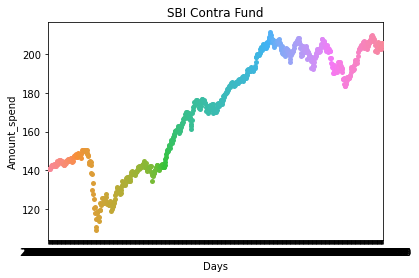

In [70]:
l[2]
x_index = list(l[2]["Date"])
y_index = list(l[2]["Open"])
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.stripplot(x_index, y_index);
  
# giving labels to x-axis and y-axis
ax.set(xlabel ='Days', ylabel ='Amount_spend')
  
# giving title to the plot
plt.title('SBI Contra Fund');
  
# function to show plot
plt.show()

In [72]:
print("heelo")

heelo


In [30]:
import pickle
file = open("linearRegressorCombined_model.pkl", 'wb')
pickle.dump(regr,file)

In [64]:
regr

LinearRegression()

In [70]:
mm.inverse_transform(np.array(regr.predict([[3,11,2019,0,1,0,0,0,0,0,0,0,0]]).reshape(-1,1)))

array([[98.93657067]])

In [31]:
import pickle
scalerfile = 'scaler.sav'
pickle.dump(mm, open(scalerfile, 'wb'))